In [1]:
from __future__ import division
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import random
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline

In [2]:
# Load in data and create dataframes
df = pd.read_csv('../data/WHO_Morticd10_part1', low_memory=False)
df2 = pd.read_csv('../data/WHO_Morticd10_part2', low_memory=False)

In [3]:
# Concatonate the dataframes together
df = pd.concat([df, df2])
df.shape

(3259428, 39)

In [4]:
df.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [5]:
# Create dataframe containing United States data
df_usa = df[df['Country'] == 2450]

In [6]:
# Restrict dataframes to death by age
df = df.ix[:,15:-5]
df_usa = df_usa.ix[:,15:-5]

In [7]:
df.head()

,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25
0,1.0,NaN,9.0,NaN,21.0,NaN,36.0,NaN,39.0,NaN,53.0,NaN,68.0,NaN,95.0,NaN,NaN,NaN,NaN
1,1.0,NaN,1.0,NaN,2.0,NaN,12.0,NaN,13.0,NaN,21.0,NaN,48.0,NaN,112.0,NaN,NaN,NaN,NaN
2,0.0,NaN,1.0,NaN,3.0,NaN,7.0,NaN,2.0,NaN,3.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,NaN,0.0,NaN,3.0,NaN,1.0,NaN,4.0,NaN,0.0,NaN,6.0,NaN,NaN,NaN,NaN
4,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [8]:
def sum_columns(data):
    """
    Input: Dataframe
    Output: List of column sums
    Sums each column of the dataframe and returns a list of sums
    """
    return list(data.sum(axis=0))

In [9]:
# Obtain column sums for globals data
deaths_global = sum_columns(df)
print deaths_global

[1630322.0, 1762194.0, 4695291.0, 7302359.0, 8802564.0, 10265036.0, 12265598.0, 16043052.0, 21676748.0, 28044451.0, 33426622.0, 41149442.0, 50765459.0, 64628227.0, 76169283.0, 79267072.0, 75875292.0, 35561852.0, 15947225.0]


In [10]:
# Obtain columns sums for United States data
deaths_usa = sum_columns(df_usa)
print deaths_usa

[87712.0, 111822.0, 394708.0, 616856.0, 632566.0, 732210.0, 1008952.0, 1561130.0, 2361496.0, 3309490.0, 4172128.0, 5025586.0, 5967630.0, 7476414.0, 9619696.0, 11592092.0, 11519520.0, 7940006.0, 3780652.0]


In [13]:
def unbin_data(deaths):
    """
    Input: List of deaths
    Output: Numpy array of unbinned deaths
    Creates a synthetic distribution by unbinning the deaths.
    Multiplies each age by its count and appends to an array
    """
    ages = [7, 12, 17, 22, 27,  32, 37, 42, 47, 52,
            57, 62, 67, 72, 77, 82, 87, 92, 97]
    unbin = np.array([])
    for i, age in enumerate(ages):
        age_dist = np.full((1, deaths[i]), age)
        unbin = np.append(unbin, age_dist)
    return unbin

In [15]:
# Unbin global data to create synthetic distribution
unbin_global = unbin_data(deaths_global)

In [17]:
# Unbin United States data to create synthetic distribution
unbin_usa = unbin_data(deaths_usa)

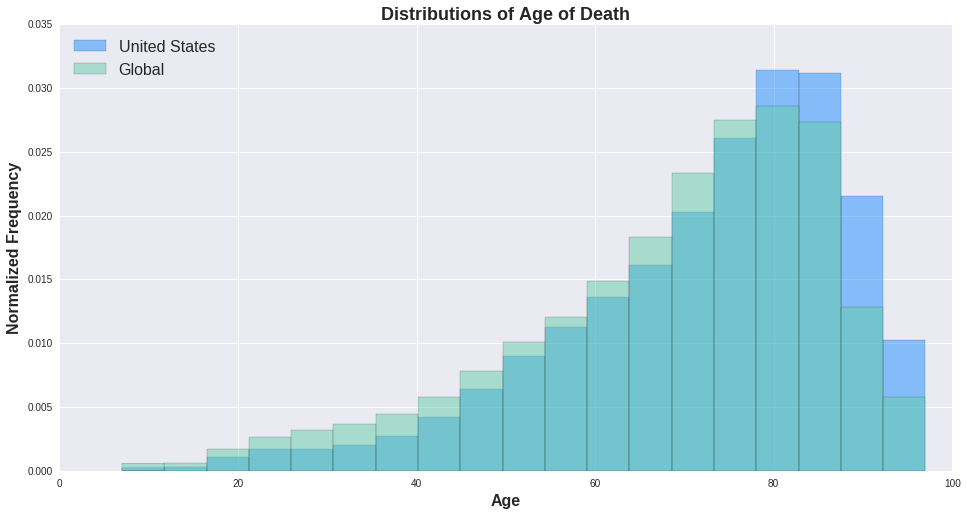

In [24]:
# Create a histograms of Globals and United States ages of death
plt.figure(figsize=(16,8))
plt.hist(unbin_usa, bins=len(deaths_usa), normed=True, alpha=0.5, color='dodgerblue');
plt.hist(unbin_global, bins=len(deaths_global), normed=True, alpha=0.5, color='mediumaquamarine');
plt.title('Distributions of Age of Death', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Frequency', fontsize=16, fontweight='bold')
plt.legend(('United States', 'Global'), fontsize=16, loc=2)
plt.savefig('who_deaths.png')

In [18]:
# Sample United States unbinned data for quicker calculations
mini_usa = random.sample(unbin_usa, 20000)

In [19]:
# Extend data range to ensure proper calculation of sum of squares error
mini_usa = np.append(mini_usa, 112)
len(mini_usa)

20001

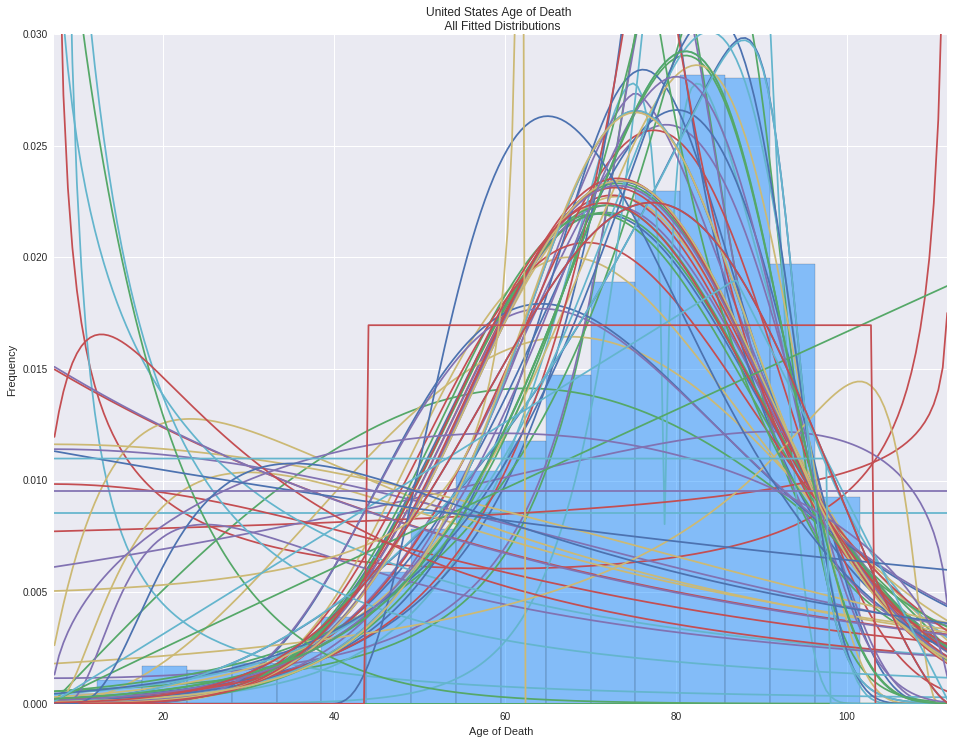

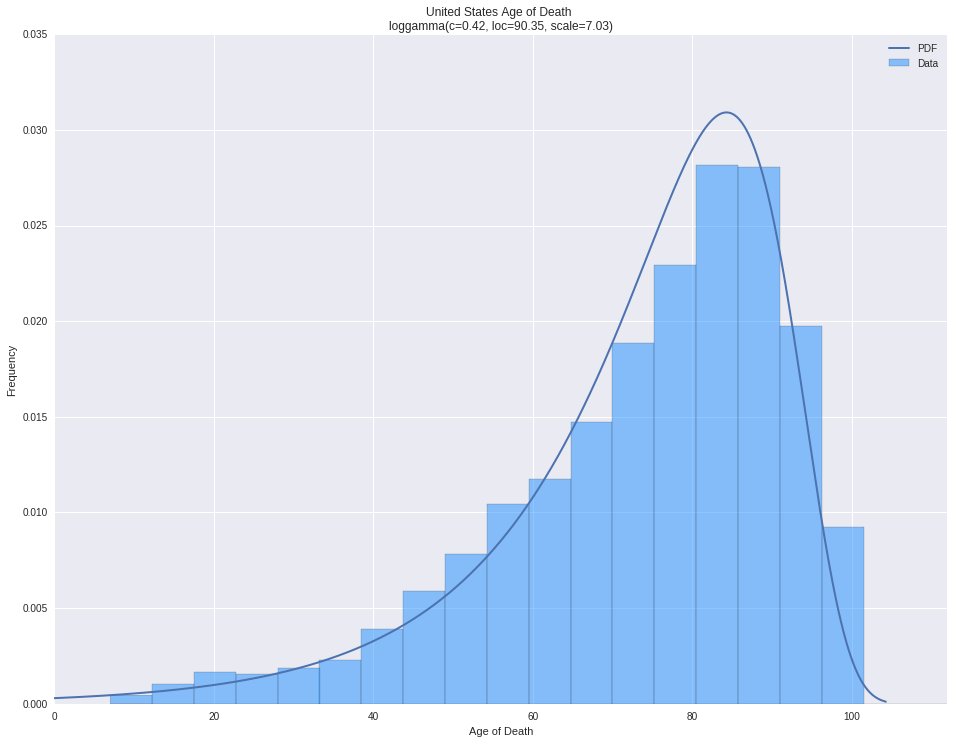

In [25]:
# Code adapted from tmthydvnprt


def best_fit_distribution(data, bins=200, ax=None):
    """
    Input: Numpy array of data, bins, ax
    Output: Best distribution name and parameters
    Model data by fitting distributions and comparing sum of squares errors
    """
    
    # Create histogram of original data
    y, x = np.histogram(data, bins=bins, normed=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # All distributions in SciPy Stats
    distributions = [        
        st.alpha, st.anglit, st.arcsine, st.beta, st.betaprime, st.bradford, 
        st.burr, st.cauchy, st.chi, st.chi2, st.cosine, st.dgamma, st.dweibull,
        st.erlang, st.expon, st.exponnorm, st.exponweib, st.exponpow, st.f,
        st.fatiguelife, st.fisk, st.foldcauchy, st.foldnorm, st.frechet_r,
        st.frechet_l, st.genlogistic, st.genpareto, st.gennorm, st.genexpon,
        st.genextreme, st.gausshyper, st.gamma, st.gengamma, st.genhalflogistic,
        st.gilbrat, st.gompertz, st.gumbel_r, st.gumbel_l, st.halfcauchy, 
        st.halflogistic, st.halfnorm, st.halfgennorm, st.hypsecant, st.invgamma,
        st.invgauss, st.invweibull, st.johnsonsb, st.johnsonsu, st.ksone, 
        st.kstwobign, st.laplace, st.levy, st.levy_l, st.levy_stable, st.logistic,
        st.loggamma, st.loglaplace, st.lognorm, st.lomax, st.maxwell, st.mielke,
        st.nakagami, st.ncx2,st.ncf, st.nct, st.norm, st.pareto, st.pearson3,
        st.powerlaw, st.powerlognorm, st.powernorm, st.rdist, st.reciprocal,
        st.rayleigh, st.rice, st.recipinvgauss, st.semicircular, st.t, st.triang,
        st.truncexpon, st.truncnorm, st.tukeylambda, st.uniform, st.vonmises,
        st.vonmises_line, st.wald, st.weibull_min, st.weibull_max, st.wrapcauchy
    ]

    # Instance variables to hold best distribution information
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in distributions:
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                # Fit dist to data
                params = distribution.fit(data)
                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                # If axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
        except Exception:
            pass
    return (best_distribution.name, best_params)


def make_pdf(dist, params, size=10000):
    """
    Input: Distribution name and parameters
    Output: PDF
    Generate Propbability Distribution Function for distribution
    """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.0001, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.0001, loc=loc, scale=scale)
    end = dist.ppf(0.9999, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.9999, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from WHO Deaths
data = pd.Series(mini_usa)

# Plot for comparison
plt.figure(figsize=(16,12))
ax = data.plot(kind='hist', bins=len(df.columns)+1, normed=True, alpha=0.5, color='dodgerblue') 
# Save plot limits
ax.xlim = (0, 112)
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_paramms = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('United States Age of Death \n All Fitted Distributions')
ax.set_xlabel('Age of Death')
ax.set_ylabel('Frequency')
plt.savefig('all_dist.png')

# Make PDF
pdf = make_pdf(best_dist, best_fit_paramms)

# Display
plt.figure(figsize=(16,12))
ax = pdf.plot(lw=2, label='PDF', legend=True)
ax.set_xlim([0, 112])
data.plot(kind='hist', bins=len(df.columns)+1, normed=True, alpha=0.5, label='Data', legend=True, ax=ax, color='dodgerblue')

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('United States Age of Death \n' + dist_str)
ax.set_xlabel('Age of Death')
ax.set_ylabel('Frequency')
plt.savefig('best_fit.png')